<a href="https://colab.research.google.com/github/apotato369550/mnist-digit-identifier-tensorflow/blob/main/mnist_digit_identifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#MNIST Digit Identifier

## Imports

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

## Loading the Dataset

In [ ]:
digits_mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = digits_mnist.load_data(path="mnist.npz")

11490434/11490434 [==============================] - 1s 0us/step


## Looking at the Data

(60000, 28, 28)
241
[5 0 4 1 9 2 1 3 1 4]


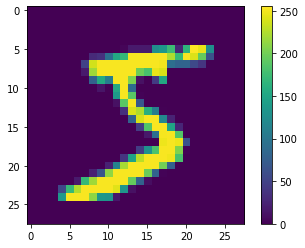

In [ ]:
print(train_images.shape)
print(train_images[0, 13, 13])
print(train_labels[:10])
class_names = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

## Data Preprocessing

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# possible ways to remedy this error:
# review image/input tensor shape
# edit the layers of the neurons and stuff
# data normalization??
# use original code as reference & change the dataset (if desperate)

## Creating and Using our Model

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(
    optimizer = "adam",
    loss = "sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.fit(train_images, train_labels, epochs=10)

# evaluating our model & getting its accuracy
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose = 1)
print("Test Accuracy: ", test_accuracy)

Epoch 1/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.2633 - accuracy: 0.9252
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1170 - accuracy: 0.9656
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0806 - accuracy: 0.9755
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0593 - accuracy: 0.9810
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0479 - accuracy: 0.9852
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0373 - accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0298 - accuracy: 0.9903
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0239 - accuracy: 0.9931
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0210 - accuracy: 0.9936
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0842

### Evaluating Our Model's Ability to Make Predictions

313/313 [==============================] - 1s 2ms/step
[1.3829325e-10 2.4703186e-14 1.0298397e-09 3.4342677e-06 1.0437860e-15
 7.5579859e-10 1.5940732e-17 9.9999636e-01 1.1929288e-10 8.4535330e-08]
7
Seven


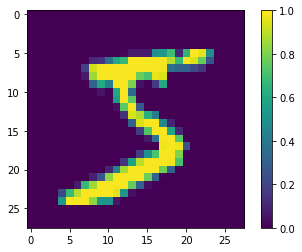

In [ ]:
# fix this??

predictions = model.predict(test_images)
print(predictions[0])
print(np.argmax(predictions[0]))
print(class_names[np.argmax(predictions[0])])

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

###Verifying Predictions

Please pick an image from 0-1000: 567
1/1 [==============================] - 0s 19ms/step


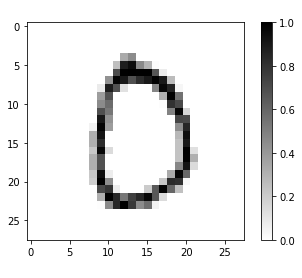

Excpected: Zero
Guess: Zero


In [ ]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ["Zero", "One", "Two", "Three", "Four", "Five", "Six", "Seven", "Eight", "Nine"]
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)

def show_image(image, label, guess):
  plt.figure()
  plt.imshow(image, cmap=plt.cm.binary)
  plt.title("Excpected: " + label)
  plt.xlabel("Guess: " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

  print("Excpected: " + label)
  print("Guess: " + guess)

def get_number():
  while True:
    number = input("Please pick an image from 0-1000: ")
    number = int(number)
    if 0 <= number <= 1000:
      return int(number)
    else:
      print("Try again...")

number = get_number()
image = test_images[number]
label = test_labels[number]
predict(model, image, label)